**A linear regression/ridge regularization of the 3 kernels(Quadratic, Cubic, RBF)**

Quadratic Kernel with regularization
MSE: 0.5157816290289756, R2: 0.29310119014946356, NMSE: 0.7068988098505364

Cubic Kernel with regularization
MSE: 0.4710441665430736, R2: 0.35441562479994737, NMSE: 0.6455843752000526

RBF Kernel
MSE: 0.5231427674181354, R2: 0.2830124633054336, NMSE: 0.7169875366945664


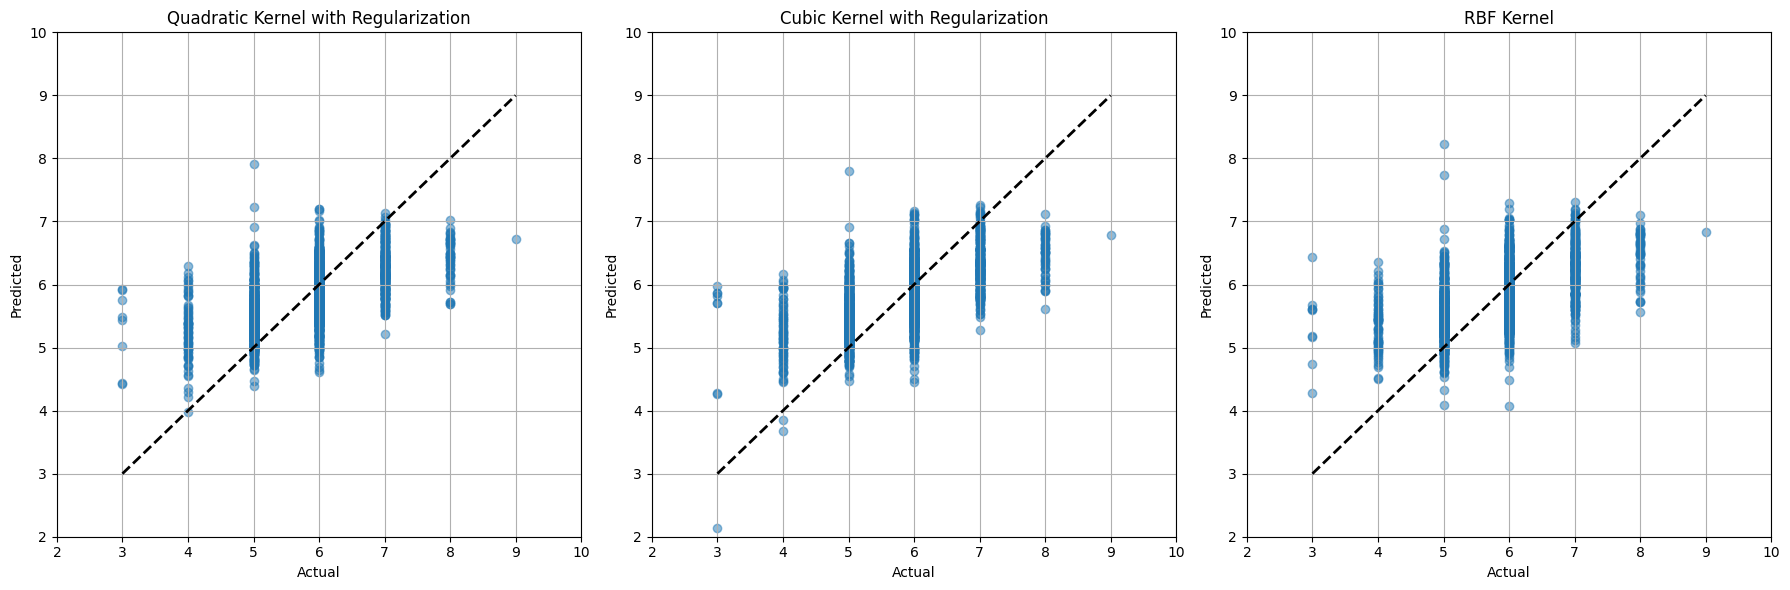

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.kernel_approximation import RBFSampler

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/186/data.csv'
df = pd.read_csv(data_url)

# Encode the 'color' column to numerical values
df['color'] = df['color'].map({'red': 0, 'white': 1})

# Define features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    nmse = mse / np.var(y_test)
    print(f'MSE: {mse}, R2: {r2}, NMSE: {nmse}')
    return y_pred

# Function to plot predicted vs actual values
def plot_predictions(y_test, y_pred, title, ax):
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(title)
    ax.set_xlim(y_test.min() - 1, y_test.max() + 1)
    ax.set_ylim(y_test.min() - 1, y_test.max() + 1)
    ax.grid()

# Quadratic Kernel
print("Quadratic Kernel with regularization")
quadratic_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=100))
])
quadratic_pipeline.fit(X_train, y_train)
y_pred_quadratic = evaluate_model(quadratic_pipeline, X_test, y_test)

# Cubic Kernel
print("\nCubic Kernel with regularization")
cubic_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=100))
])
cubic_pipeline.fit(X_train, y_train)
y_pred_cubic = evaluate_model(cubic_pipeline, X_test, y_test)

# RBF Kernel
print("\nRBF Kernel")
rbf_pipeline = Pipeline([
    ('rbf_features', RBFSampler(gamma=0.001, random_state=0)),  # Approximating RBF kernel
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])
rbf_pipeline.fit(X_train, y_train)
y_pred_rbf = evaluate_model(rbf_pipeline, X_test, y_test)

# Plot all predictions together
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_predictions(y_test, y_pred_quadratic, 'Quadratic Kernel with Regularization', axs[0])
plot_predictions(y_test, y_pred_cubic, 'Cubic Kernel with Regularization', axs[1])
plot_predictions(y_test, y_pred_rbf, 'RBF Kernel', axs[2])

plt.tight_layout()
plt.show()


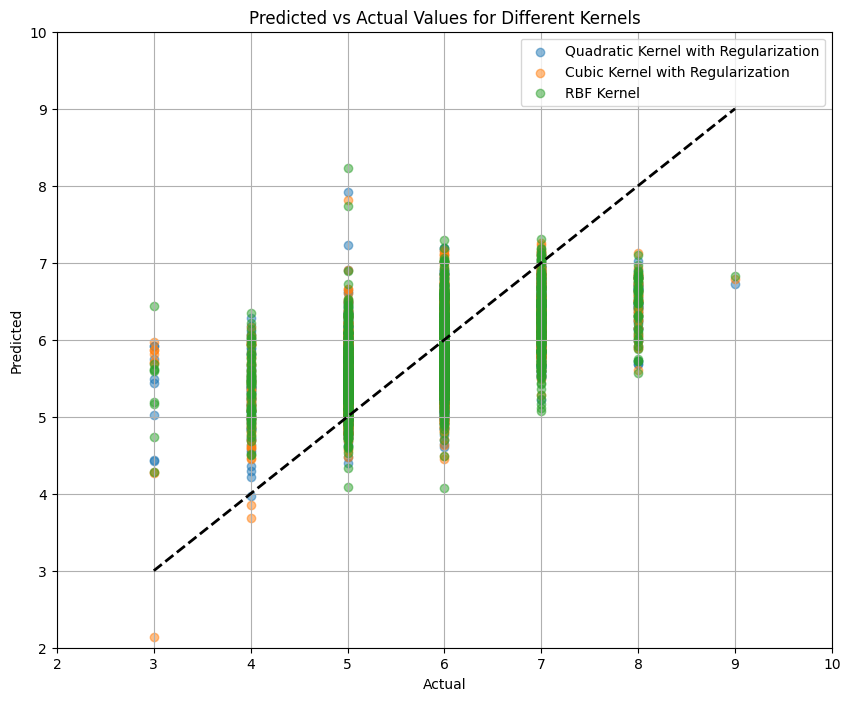

In [ ]:
# Plot all predictions together
plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred_quadratic, alpha=0.5, label='Quadratic Kernel with Regularization')
plt.scatter(y_test, y_pred_cubic, alpha=0.5, label='Cubic Kernel with Regularization')
plt.scatter(y_test, y_pred_rbf, alpha=0.5, label='RBF Kernel')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values for Different Kernels')
plt.xlim(y_test.min() - 1, y_test.max() + 1)
plt.ylim(y_test.min() - 1, y_test.max() + 1)
plt.legend()
plt.grid()
plt.show()

**Analysis**

The cubic kernel demonstrated superior performance, probably due to its ability to effectively capture higher-order interactions and non-linear patterns within the data, surpassing both the quadratic and RBF kernels. The quadratic kernel showed moderate results, offering an improvement over linear models but still falling short in fully addressing the data's complexity. On the other hand, the RBF kernel, despite its inherent flexibility, was the least effective in this scenario, potentially because it either overfitted the data or added unnecessary complexity.

As shown above, the results on the Cubic Kernel with regularization appear to have the most positive effect on the space, as they result in the lowest MSE and NMSE, and the highest R2. This suggests that the Cubic Kernel provides a better fit and more accurate predictions compared to the Quadratic Kernel with regularization and the RBF Kernel.

This indicates that the most effective feature space for addressing this problem is likely situated between the expansions of second-order and third-order polynomials, which is effectively represented by the cubic kernel.

**SVR with 3 kernels(Quadratic, Cubic, RBF)**


Evaluating SVR with quadratic kernel:
MSE: 0.49708851596038467, R2: 0.3187208296187206, NMSE: 0.6812791703812794

Evaluating SVR with cubic kernel:
MSE: 0.45159362214366283, R2: 0.3810733534064775, NMSE: 0.6189266465935225

Evaluating SVR with rbf kernel:
MSE: 0.42903900015125707, R2: 0.4119853412434167, NMSE: 0.5880146587565833


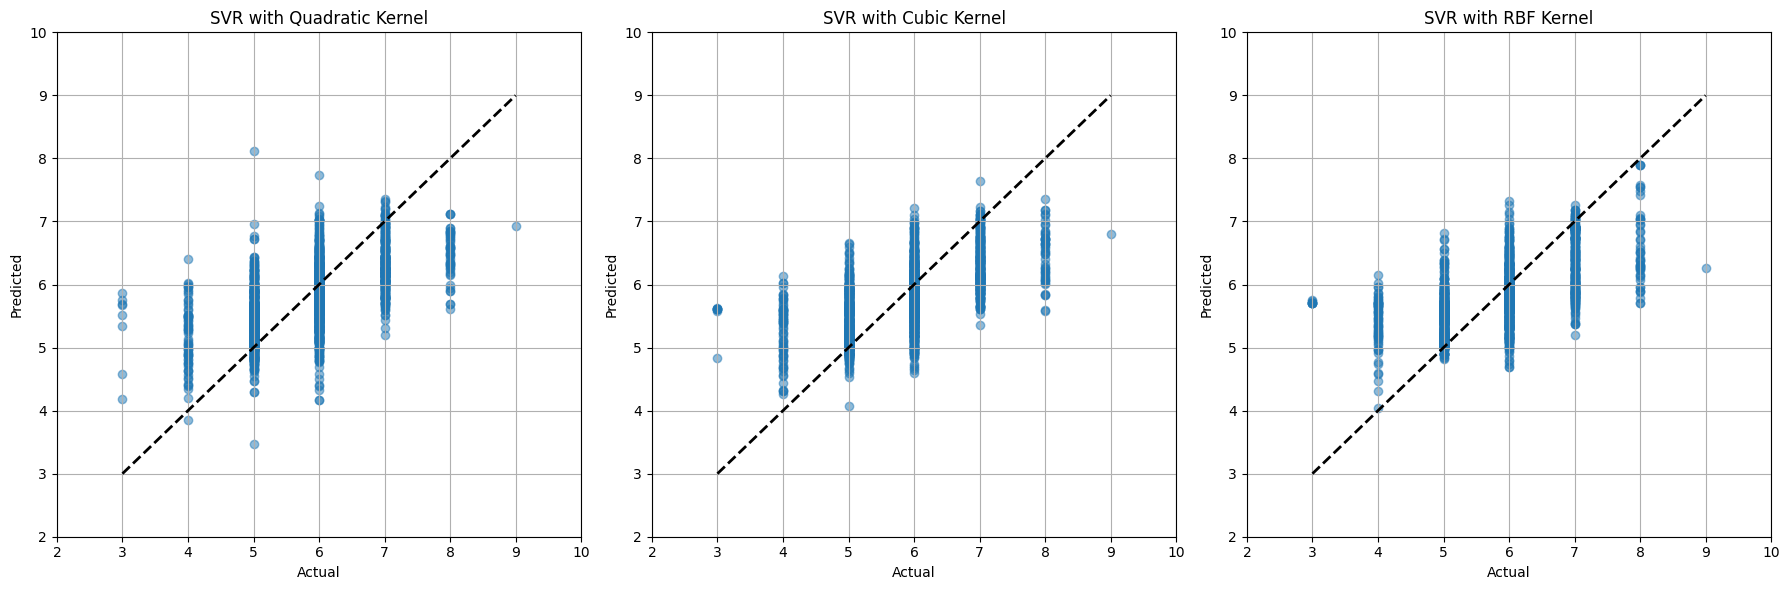

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.kernel_approximation import RBFSampler

# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/186/data.csv'
df = pd.read_csv(data_url)


# Encode the 'color' column to numerical values
df['color'] = df['color'].map({'red': 0, 'white': 1})

# Define features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    nmse = mse / np.var(y_test)  # Calculate NMSE
    print(f'MSE: {mse}, R2: {r2}, NMSE: {nmse}')
    return y_pred

# A function to build and evaluate the SVR model with different kernels
def svr_with_kernel(kernel_name):
    if kernel_name == 'quadratic':
        poly_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('poly_features', PolynomialFeatures(degree=2)),
            ('svr', SVR(C=1, kernel='linear'))  # Use linear kernel, but with quadratic features
        ])
        poly_pipeline.fit(X_train, y_train)
        print(f'\nEvaluating SVR with {kernel_name} kernel:')
        y_pred = evaluate_model(poly_pipeline, X_test, y_test)
    elif kernel_name == 'cubic':
        poly_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('poly_features', PolynomialFeatures(degree=3)),
            ('svr', SVR(C=1, gamma=0.001, kernel='rbf'))  # Use RBF kernel
        ])
        poly_pipeline.fit(X_train, y_train)
        print(f'\nEvaluating SVR with {kernel_name} kernel:')
        y_pred = evaluate_model(poly_pipeline, X_test, y_test)
    elif kernel_name == 'rbf':
        rbf_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svr', SVR(C=1, gamma=1, kernel='rbf'))  # Use RBF kernel
        ])
        rbf_pipeline.fit(X_train, y_train)
        print(f'\nEvaluating SVR with {kernel_name} kernel:')
        y_pred = evaluate_model(rbf_pipeline, X_test, y_test)

    return y_pred

# Evaluate the models with different kernels
y_pred_quadratic = svr_with_kernel('quadratic')
y_pred_cubic = svr_with_kernel('cubic')
y_pred_rbf = svr_with_kernel('rbf')

# Function to plot predictions
def plot_predictions(y_test, y_pred, title, ax):
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(title)
    ax.set_xlim(y_test.min() - 1, y_test.max() + 1)
    ax.set_ylim(y_test.min() - 1, y_test.max() + 1)
    ax.grid()

# Plot all predictions together
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_predictions(y_test, y_pred_quadratic, 'SVR with Quadratic Kernel', axs[0])
plot_predictions(y_test, y_pred_cubic, 'SVR with Cubic Kernel', axs[1])
plot_predictions(y_test, y_pred_rbf, 'SVR with RBF Kernel', axs[2])

plt.tight_layout()
plt.show()


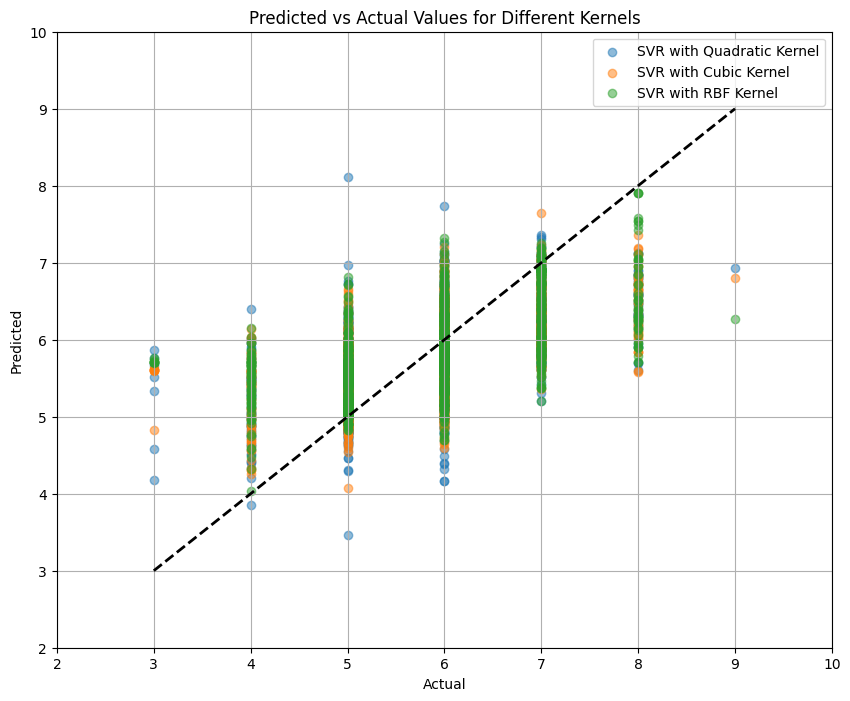

In [ ]:
 #Plot all predictions together
plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred_quadratic, alpha=0.5, label='SVR with Quadratic Kernel')
plt.scatter(y_test, y_pred_cubic, alpha=0.5, label='SVR with Cubic Kernel')
plt.scatter(y_test, y_pred_rbf, alpha=0.5, label='SVR with RBF Kernel')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values for Different Kernels')
plt.xlim(y_test.min() - 1, y_test.max() + 1)
plt.ylim(y_test.min() - 1, y_test.max() + 1)
plt.legend()
plt.grid()
plt.show()

**Analysis**

The quadratic kernel has the highest MSE and NMSE, and the lowest R2 among the three kernels. This indicates that the quadratic kernel is the least effective in capturing the underlying patterns in the data, resulting in poorer predictive performance. The cubic kernel shows an improvement over the quadratic kernel, with a lower MSE and NMSE, and a higher R2. This suggests that the cubic kernel is better at fitting the data and provides more accurate predictions compared to the quadratic kernel. The RBF kernel has the lowest MSE and NMSE, and the highest R2 among the three kernels. This indicates that the RBF kernel is the most effective in capturing the complex relationships in the data, leading to the best predictive performance.


The RBF kernel performs the best, likely due to its ability to model non-linear relationships effectively.
In conclusion, the choice of kernel significantly affects the performance of the SVR model, with the RBF kernel providing the best results in this case.